# GRIP - THE SPARKS FOUNDATION
## Exploratory Data Analysis - Retail
### Task-3 
#### Perform 'Exploratory Data Analysis' on dataset 'SampleSuperstore'
#### In this model we have to find out weak areas where we can work to make more profit.

## Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load the data

In [2]:
data=pd.read_csv('E:\Akansha\Datasets\GRIP task datasets/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Preprocessing

In [3]:
data.shape

(9994, 13)

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### There is no null values in the data.

In [5]:
data['Country'].nunique()

1

In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [3]:
data.duplicated().sum()

17

#### There are 17 duplicated values in the dataset. So, we will drop the duplicate.

In [3]:
data=data.drop_duplicates()
data.shape

(9977, 13)

#### Postal Code and Country can be dropped because Postal code is not used for analysis and Country data is only for USA Postal Code and Country can be dropped because Postal code is not used for analysis and Country data is only for USA

In [4]:
store_data=data.drop(['Postal Code','Country'],axis=1)
store_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Data Visualizations

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

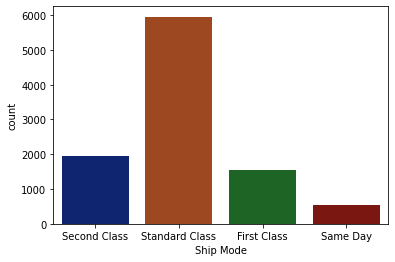

In [98]:
sns.countplot('Ship Mode',data=store_data,palette='dark')

#### Most of the shipping mode was from the Standard class

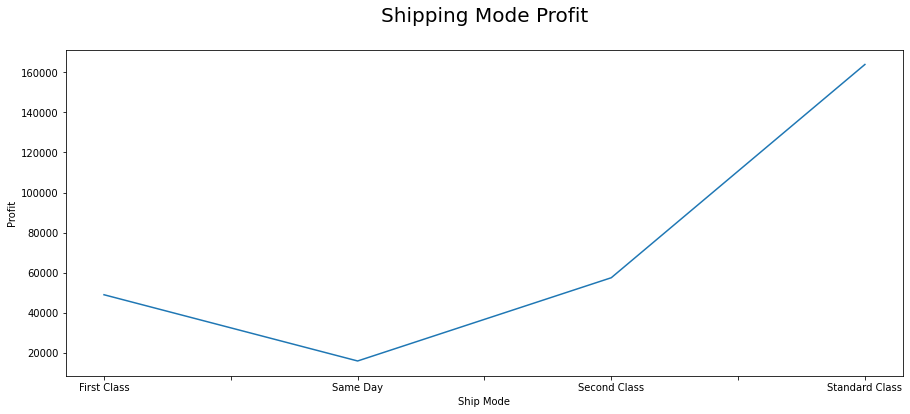

In [108]:
#Checking on the Shipmode variable with the profit

plt.figure(figsize=(15,6))
df_group_city=store_data.groupby(["Ship Mode"])["Profit"].sum()
df_group_city.plot.line()
plt.title('Shipping Mode Profit\n',fontsize=20)
plt.ylabel('Profit')
plt.show()

#### The Standard Class is a shipping mode making more profit among all the other mode.

## CATEGORY

<AxesSubplot:xlabel='Category', ylabel='count'>

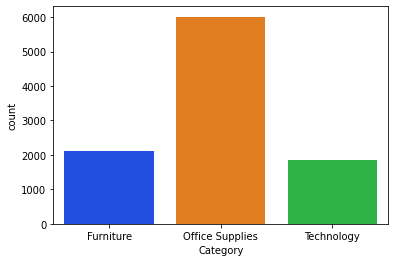

In [97]:
sns.countplot('Category',data=store_data,palette='bright')

#### The office supplies are the highest ordered or preferred category .

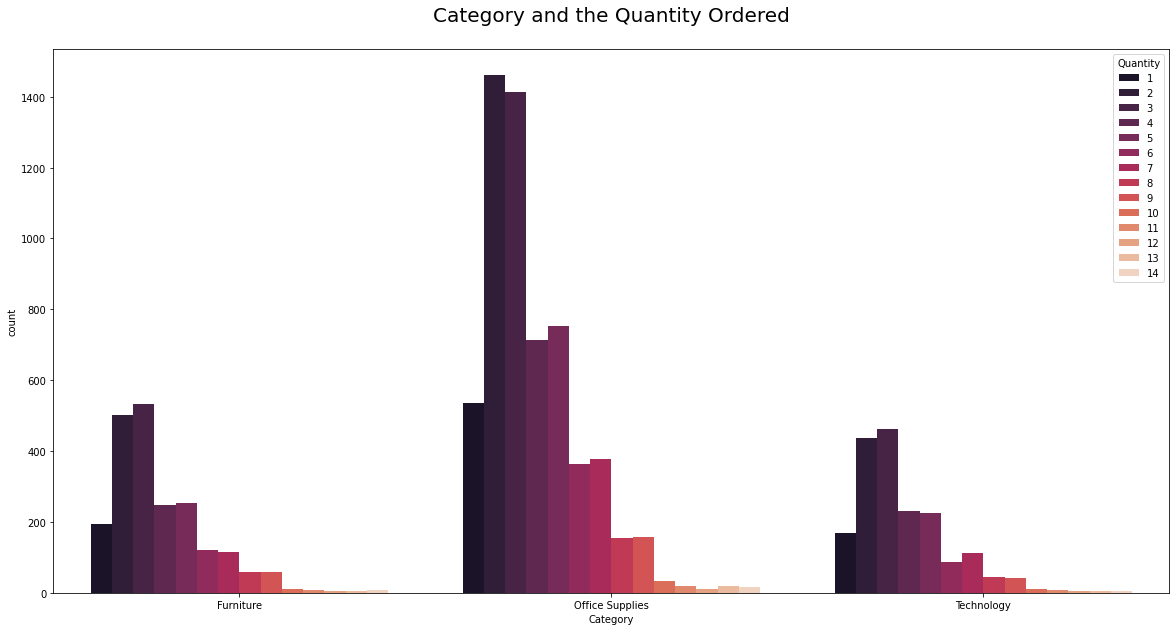

In [48]:
#visualizing category and the quantity ordered from that category.

plt.figure(figsize=(20,10))
sns.countplot("Category",data=store_data,hue="Quantity",palette='rocket')
plt.title("Category and the Quantity Ordered\n",fontsize=20)
plt.show()

#### The office supplies was the highest in demand category among all with high quantity ordered.

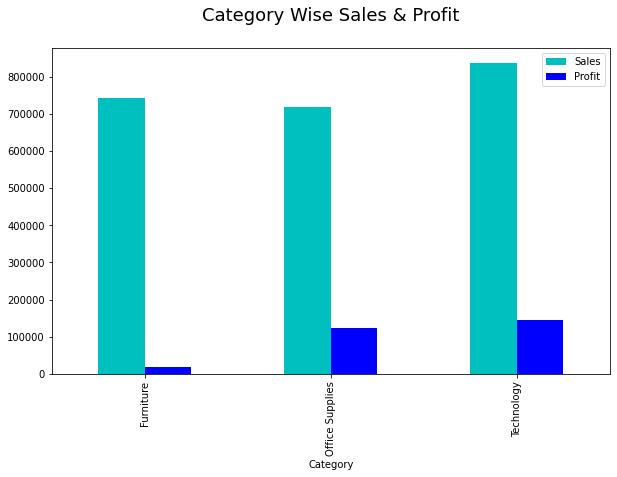

In [49]:
store_data.groupby('Category')['Sales','Profit'].sum().plot.bar(color=['c','blue'],figsize= (10,6))
plt.title('Category Wise Sales & Profit\n',fontsize=18)
plt.show()

#### The technology has highest Sales and Profit whereas Office Supplies has least but gives more Profit than Furniture. 

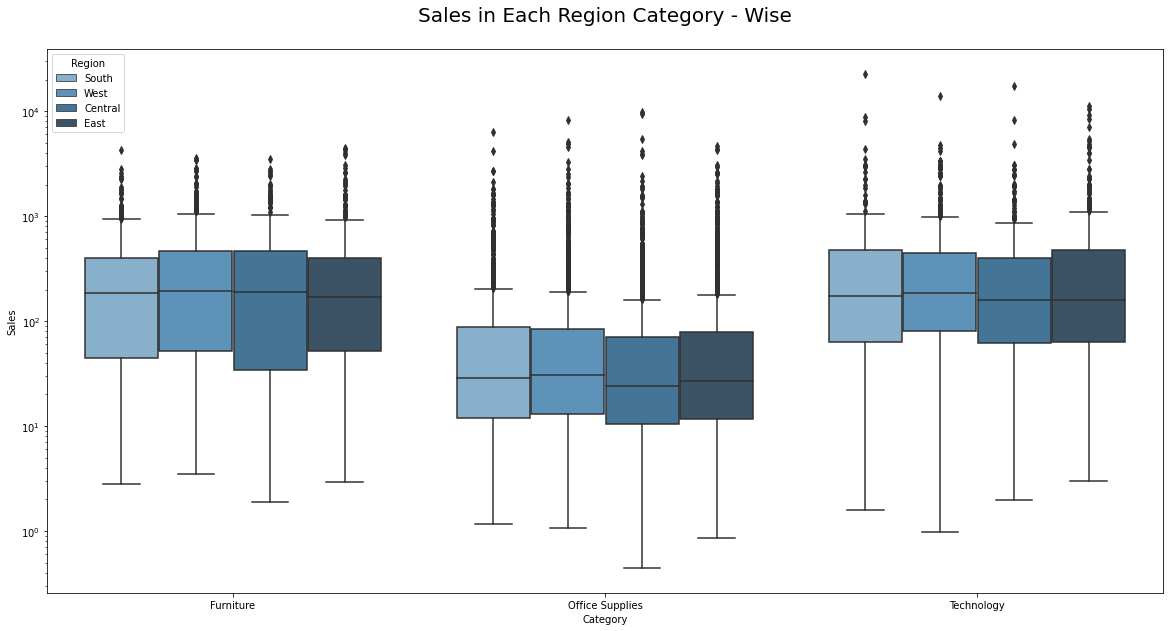

In [89]:
#visualizing the category variable with the sales and region 

plt.figure(figsize = (20, 10))
ax=sns.boxplot(x = 'Category', y = 'Sales', hue = 'Region', data = store_data,palette='Blues_d')
plt.title('Sales in Each Region Category - Wise\n',fontsize=20)
ax.set_yscale('log')
plt.show()

#### The furniture have a good business in the western region and so is the technology.
#### The office supply in the east is not much as the furniture in the east and the technology.
#### The technology makes good profit in the south region.

## SUB-CATEGORY

In [13]:
store_data.groupby(['Category','Sub-Category']).sum()

Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Furniture       Bookcases     114879.9963       868     48.14  -3472.5560
                Chairs        327777.7610      2351    104.70  26567.1278
                Furnishings    91683.0240      3560    132.40  13052.7230
                Tables        206965.5320      1241     83.35 -17725.4811
Office Supplies Appliances    107532.1610      1729     77.60  18138.0054
                Art            27107.0320      2996     59.60   6524.6118
                Binders       203409.1690      5971    566.20  30228.0003
                Envelopes      16476.4020       906     20.40   6964.1767
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12444.9120      1396     25.00   5526.3820
                Paper          78224.1420      5144    101.80  33944.2395
                Storage       223843.6080      3158     63.20  21278.8264
                Supplies       46673.5380       647     14.60  -1189.0995
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      189238.6310       440     35.20   3384.7569
                Phones        330007.0540      3289    137.40  44515.7306

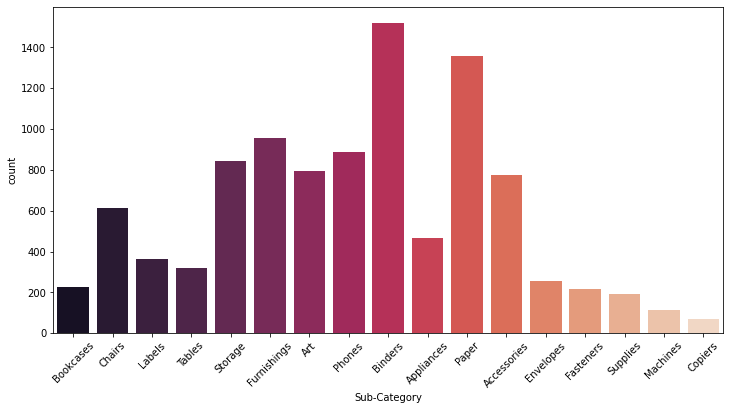

In [23]:
plt.figure(figsize=(12,6))
sns.countplot('Sub-Category',data=store_data,palette='rocket')
plt.xticks(rotation=45)
plt.show()

#### Among the categories we saw in the previous plot where Office supplies was the highest. The Sub category that is the binders are the highest Office Supplies in demand when it comes to business.

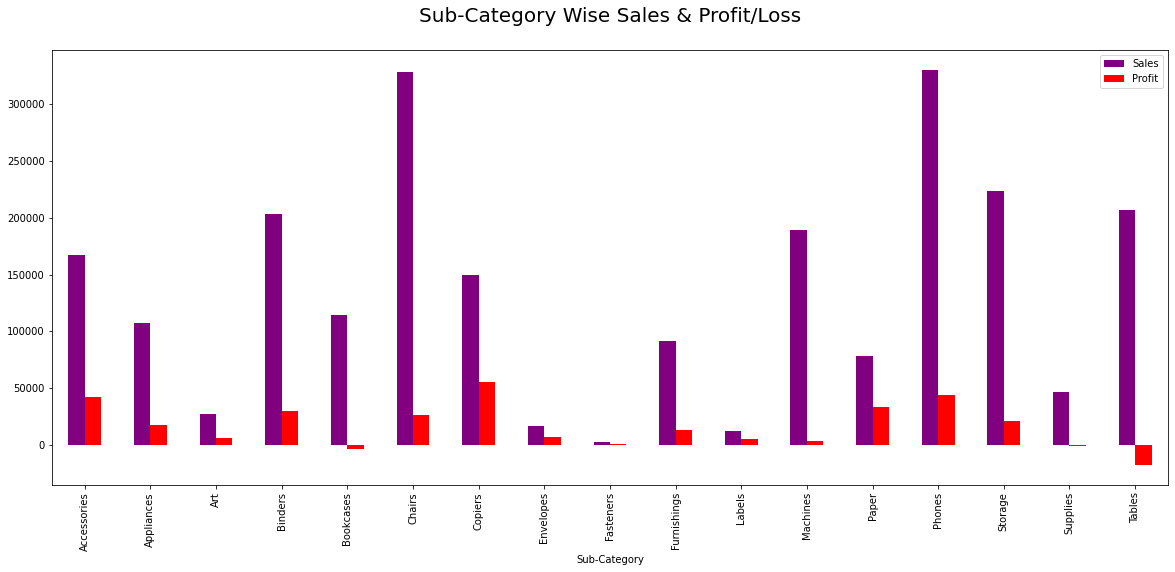

In [5]:
store_data.groupby('Sub-Category')['Sales','Profit'].sum().plot.bar(color=['purple','red'],figsize= (20,8))
plt.title('Sub-Category Wise Sales & Profit/Loss\n',fontsize=20)
plt.show()

#### In the Technology, the sub category Phones and sub category Chairs in Furniture Category are highly in demand. 

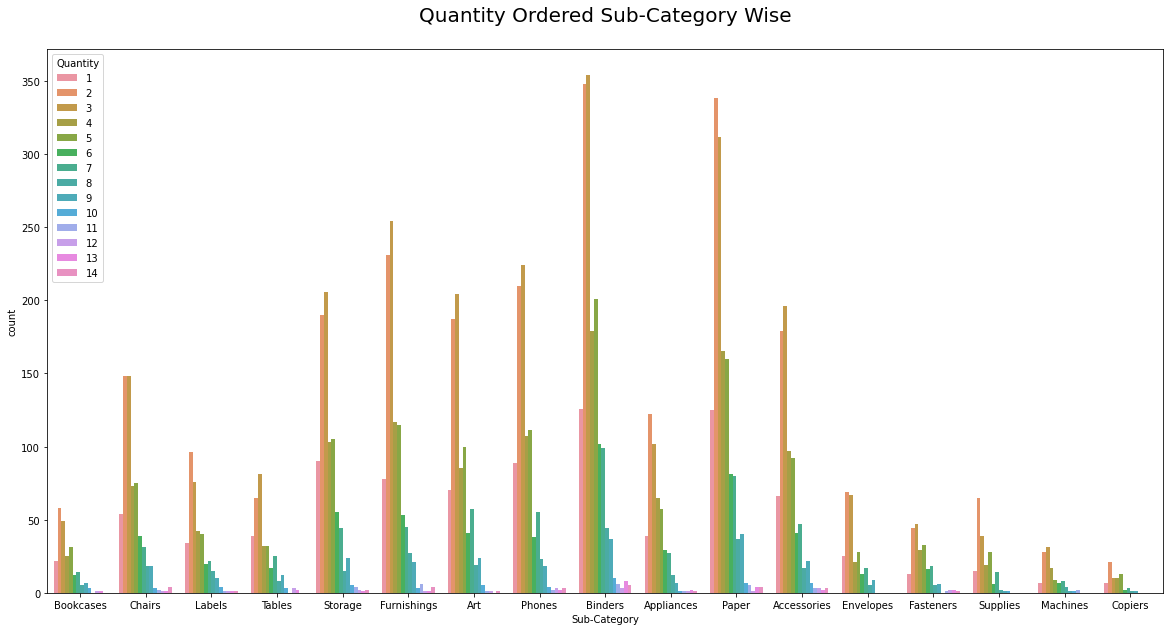

In [11]:
#visualizing region and the quantity ordered from that region

plt.figure(figsize=(20,10))
sns.countplot("Sub-Category",data=store_data,hue="Quantity")
plt.title("Quantity Ordered Sub-Category Wise\n",fontsize=20)
plt.show()

#### In the office supplies the sub category highly in demand is the Binders.
#### The paper also is one of the highest in demand sub category
#### We can say that most of the good profit is made by the office supplies provided are high in demand and thus business is making good profit from it.

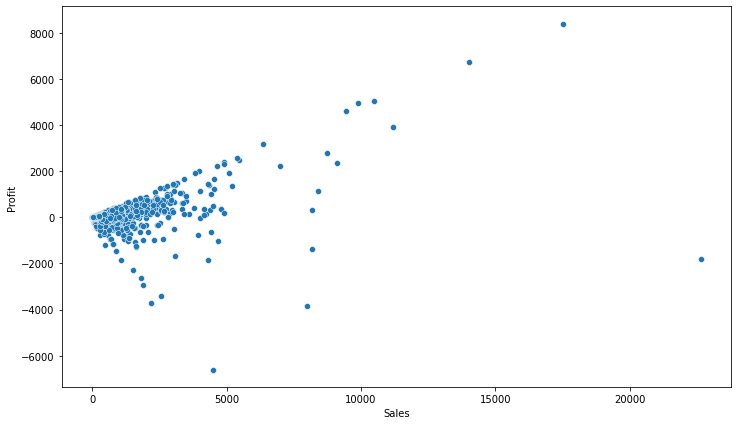

In [6]:
#the relation between the two variable profit and sales 

plt.figure(figsize=(12,7))
sns.scatterplot(store_data['Sales'],store_data['Profit'])
plt.show()

#### We observe that the increase in the sales dosn't have much impact on the profit
#### At certain point the increase in sales have good impact on making the profit but after that when the sale is higher not much helping to earn profit.

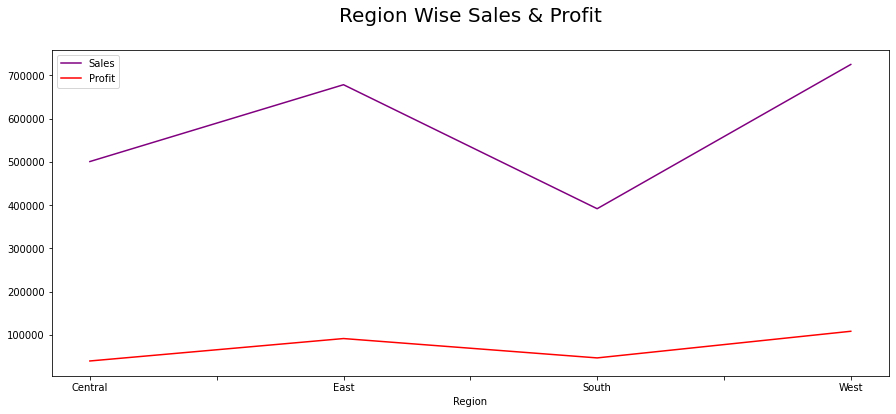

In [8]:
store_data.groupby('Region')['Sales','Profit'].sum().plot.line(color=['purple','red'],figsize= (15,6))
plt.title('Region Wise Sales & Profit\n',fontsize=20)
plt.show()

#### The west region is the highest in ordering and being active in the business.
#### The east region is the second highest in ordering the good amount of products of business .
#### we can assume higher the sales and there is a good profit in that region

## SEGMENT

<AxesSubplot:xlabel='Segment', ylabel='count'>

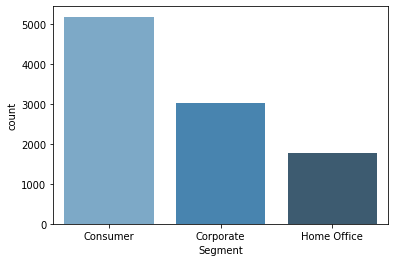

In [25]:
sns.countplot('Segment',data=store_data,palette='Blues_d')

#### Consumer segment has larger participation as compared to other segments

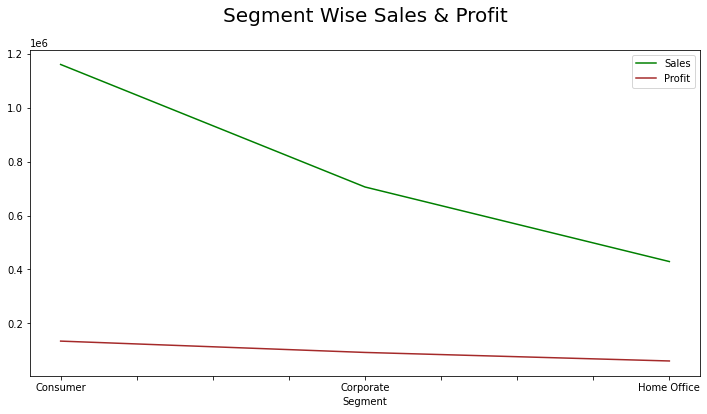

In [17]:
store_data.groupby('Segment')['Sales','Profit'].sum().plot.line(color=['green','brown'],figsize= (12,6))
plt.title('Segment Wise Sales & Profit\n',fontsize=20)
plt.show()

#### The consumer segment is making good sales and profit. Let's viaualize the sales of segments region-wise.

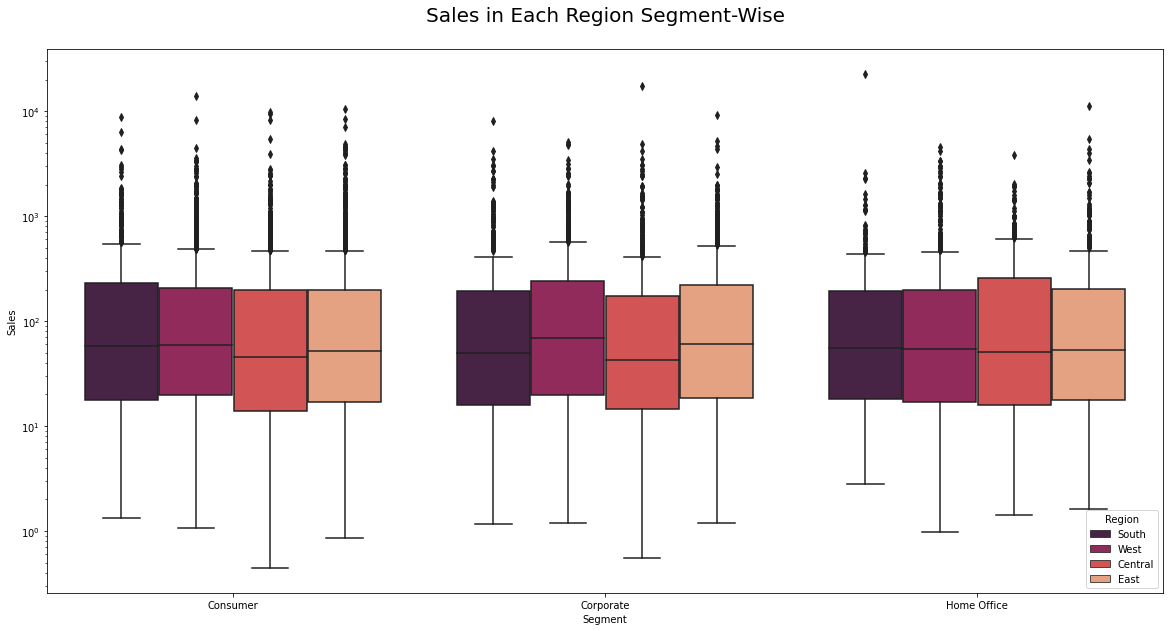

In [19]:
plt.figure(figsize = (20, 10))
ax=sns.boxplot(x = 'Segment', y = 'Sales', hue = 'Region', data = store_data,palette='rocket')
plt.title('Sales in Each Region Segment-Wise\n',fontsize=20)
ax.set_yscale('log')
plt.show()

#### The Corporate segment in the west makes good sales.
#### The home office in the Central also has a good profit making business
#### The consumers in all the regions are making a good profit

## STATE

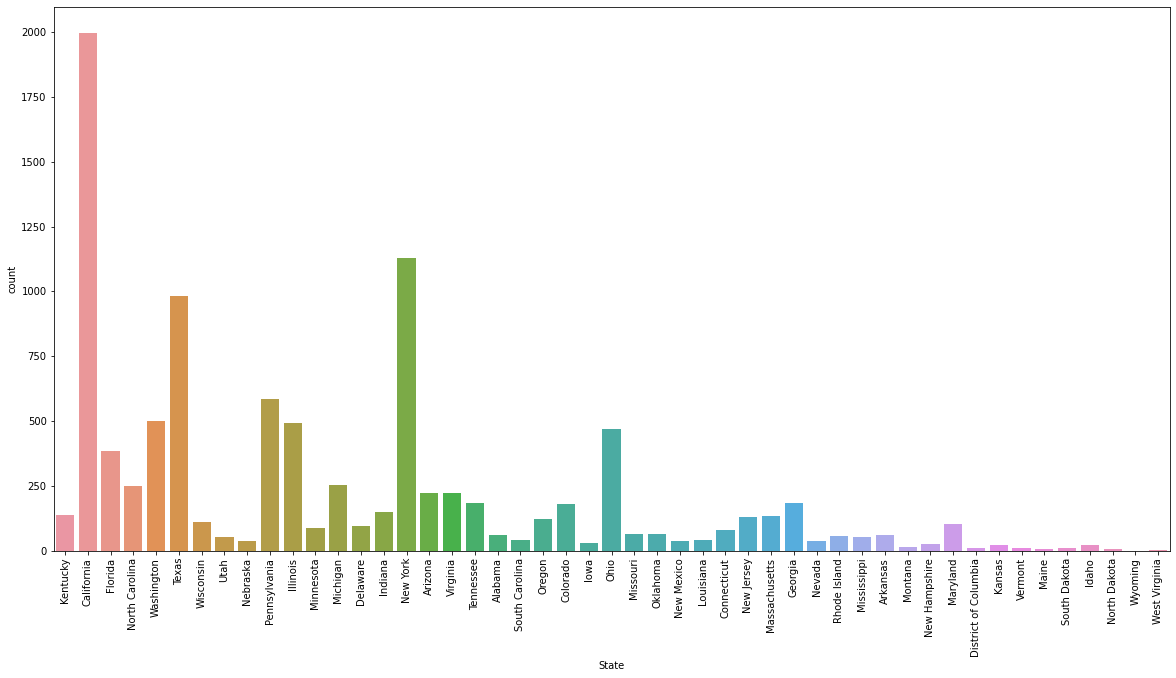

In [111]:
plt.figure(figsize=(20,10))
sns.countplot('State',data=store_data)
plt.xticks(rotation=90)
plt.show()

#### Few states have high activity in business
#### States like California,Texas,New York, Ohioetc. are active in the business
#### States like West Virginia, District of Columbia etc are least involved

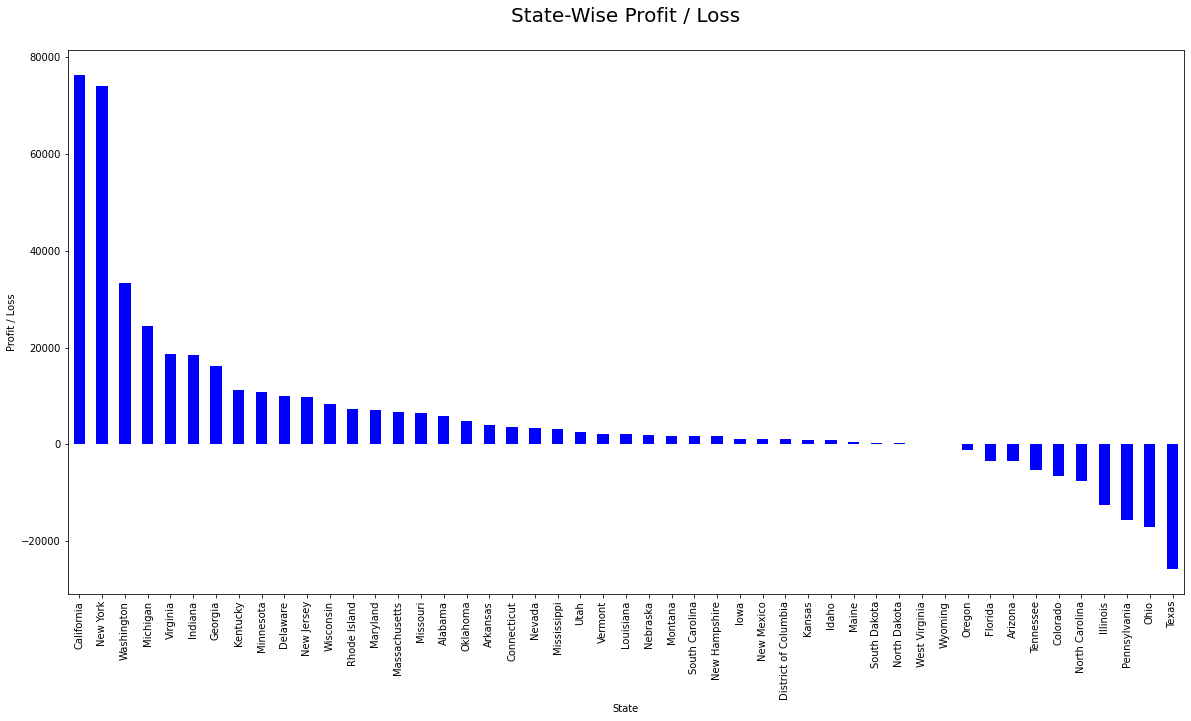

In [58]:
df_group=store_data.groupby(["State"])['Profit'].sum()
df_group.sort_values(ascending=False,inplace=True)
df_group.plot.bar(figsize=(20,10),color='blue')
plt.title('State-Wise Profit / Loss\n',fontsize=20)
plt.ylabel('Profit / Loss')
plt.show()

#### The state " California " Shows the highest profit
#### The states like New York , Washington etc shown good profit
#### On the other hand few states like Texas , Ohio has the reverse impact on the profit though the paticipation was more in these states still the states has shown loss than profit

## CITY

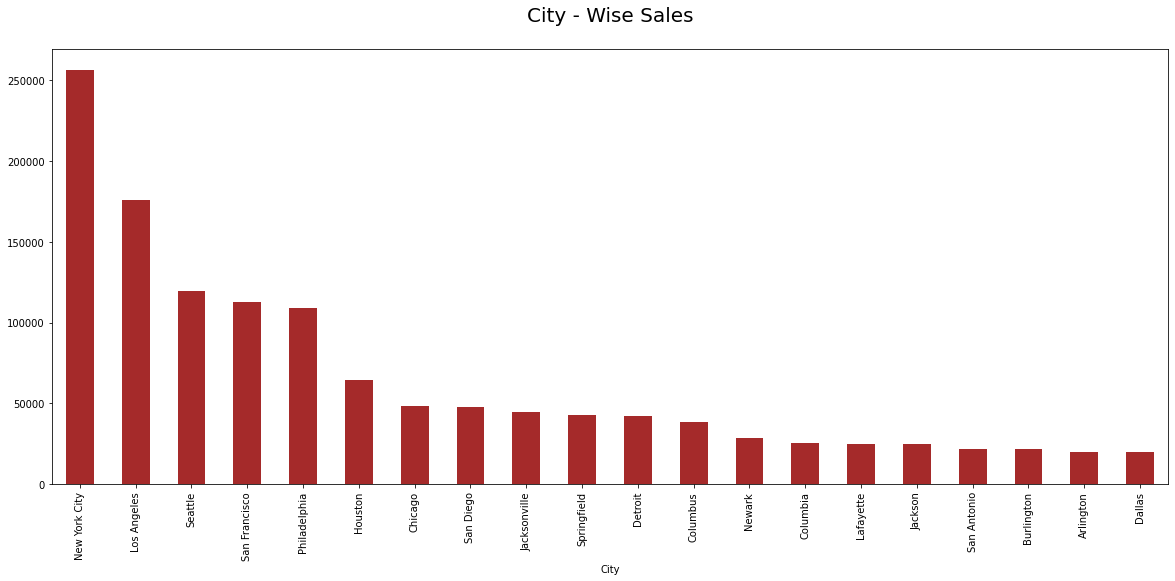

In [86]:
df_group_city=store_data.groupby(["City"])['Sales'].sum()
df_top=df_group_city[df_group_city>20000]
df_top.sort_values(ascending=False,inplace=True)
df_top.plot.bar(figsize=(20,8),color='brown')
plt.title('City - Wise Sales\n',fontsize=20)
plt.show()

#### From the above we can observe that the cities like New York City , Los Angeles ,Seattle had good sales rate and thus had good profit too.
#### Thus focusing on the cities were sale was less may increase the profit. Cities like Dellas, Arlington .etc

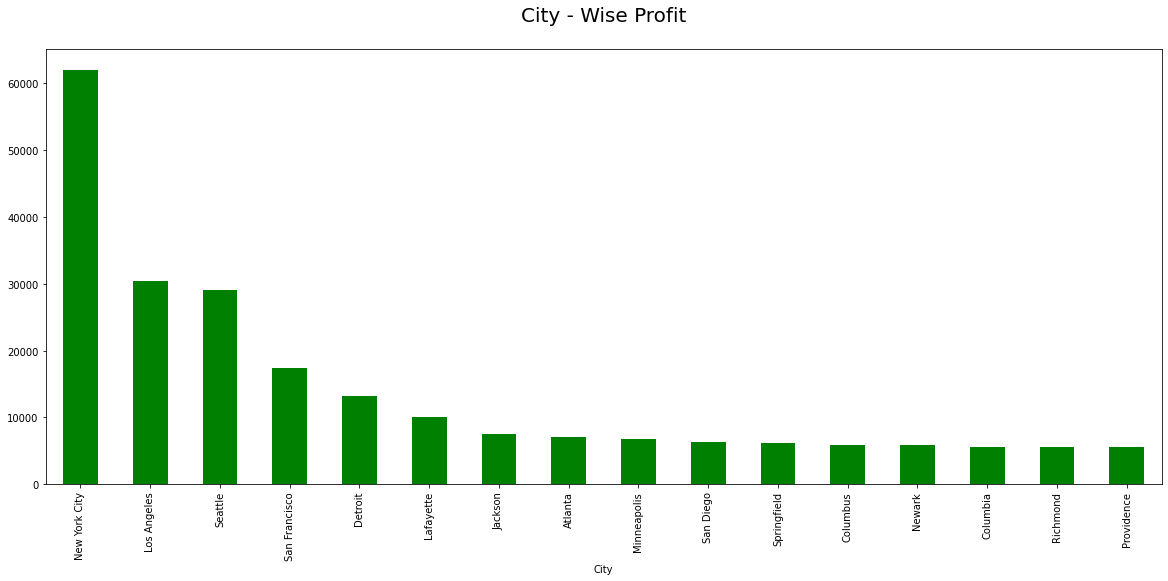

In [88]:
plt.figure(figsize=(20,8))
df_group_city=store_data.groupby(["City"])["Profit"].sum()
df_top=df_group_city[df_group_city>5000]
df_top.sort_values(ascending=False,inplace=True)
df_top.plot.bar(color='green')
plt.title('City - Wise Profit\n',fontsize=20)
plt.show()

#### We can observe few profit making cities like New york city,Los Angeles,Seattle etc .
#### We can focus on few cities which might see rise in the profit like Providence,Richmond,COlumbia etc,

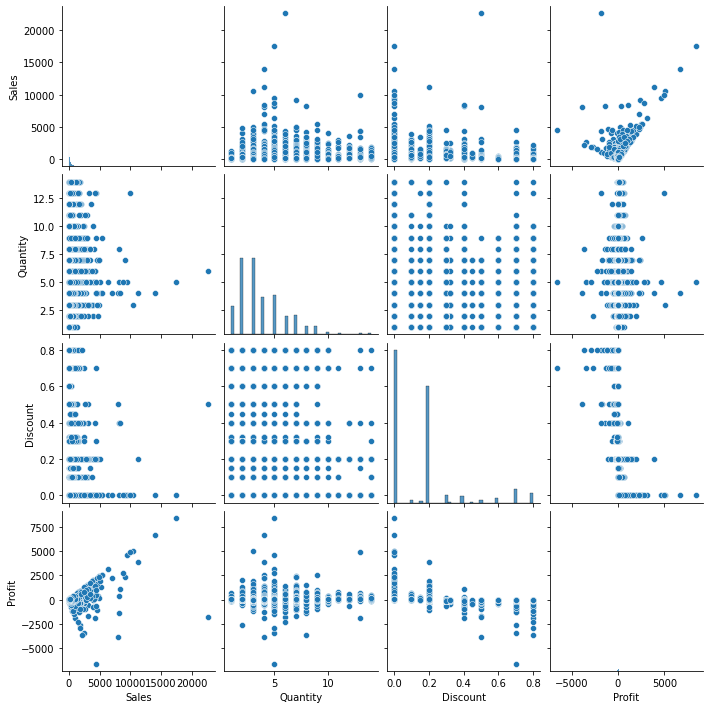

In [91]:
sns.pairplot(store_data)

#### The profit and the sales are not directly or inversly proportion to each other we can see that the higher the sale the profit also is higher but there is also some lossm observed when there was a sale

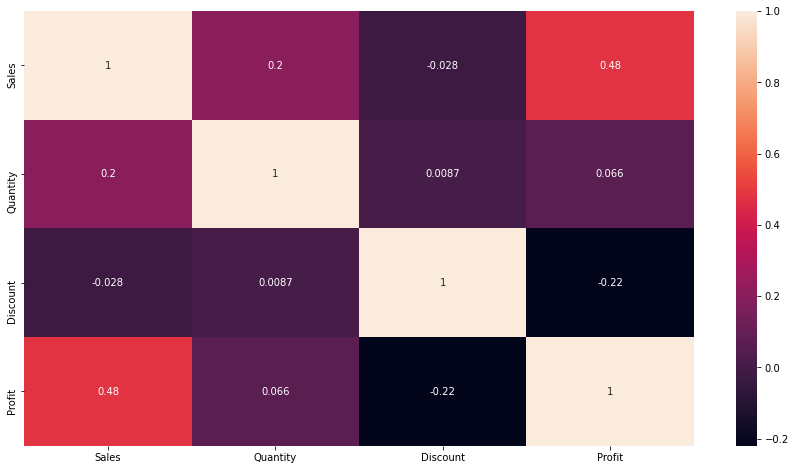

In [92]:
#heatmap to check the correlation of the dataset

plt.figure(figsize=(15,8))
sns.heatmap(store_data.corr(),annot=True)
plt.show()

## Conclusion
#### From All these analysis we finally conclude that,
#### 1) Here we also focus on our Office Supplies category business because sales of these category is less as compared to other two.
#### 2) We have to concentrate on the Sales of 'West Virginia' State and 'San Luis Obispo' and 'Woodland' City.
#### 3) For enhancing the profits , we need to sell more to the states which are liking our products¶ like NEWYORK and CALIFORNIA .
#### 4) If we give more Discount on products our sales goes increses but Profit get down.
#### 5) The discount is not much affecting the profit hence this feature should be taken care . May be the good discount may benifit the business.
#### 6) In Technology category business we get more Profit as compared to other two business.These is because of we given less Discount.
#### 7) Also Sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses.
#### 8) To rise the profits , we first need to sell consumer segment products more .

#### From the Above data Visualization and Clustering we can see that in Which states and in which Category Sales and profits are High or less,We can improve in that States By Providing Discounts in prefered Range so that Company and cosumer both will be in profit.So For Deciding that Range we have to do some Technical Analysis.One can Do it through Factor Analysis,or also can Do it throgh neural networks.
#### One thing to be noted is that while the superstore is incurring losses due to giving discounts on its products, they can't stop giving discounts of their products. Most of the heavy discounts are during festivals, end-of-season and clearance sales which are necessary so that the store can make space in their warehouses for fresh stock. Also, by incurring small losses, the company gains in the future by attracting more long term customers. Therefore, the small losses from discounts are an essential part of company's business

## Thank You!